In [3]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
df = pd.read_csv("data.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Finding median to get an estimate of AOV

In [16]:
df['order_amount'].median()

284.0

### Box plot for finding outliers

<AxesSubplot:>

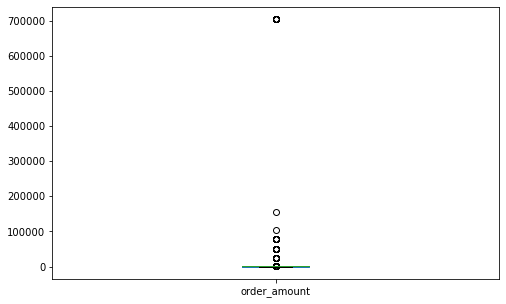

In [19]:
#To see the outliers, we use a box plot.
df['order_amount'].plot(kind='box', figsize=(8,5))

### Filtering out the outliers 1.5 times above and below the third and first quartile respectively.

In [14]:
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['order_amount'] >= Q1 - 1.5 * IQR) & (df['order_amount'] <= Q3 + 1.5 *IQR)
df1 = df.loc[filter]  


### Finding mean after removing outliers

In [20]:
df1['order_amount'].mean()

293.7153735336489

### Adding a column price_per_item and then calculating the mean to get an AOV estimate.

In [22]:
df['price_per_item'] = df['order_amount'] / df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [23]:
df['price_per_item'].mean()

387.7428